In [25]:
#QUESTION 9
#CAN WE IDENTITFY ANY RELATION BETWEEN FAMILY INCOME AND GPA?

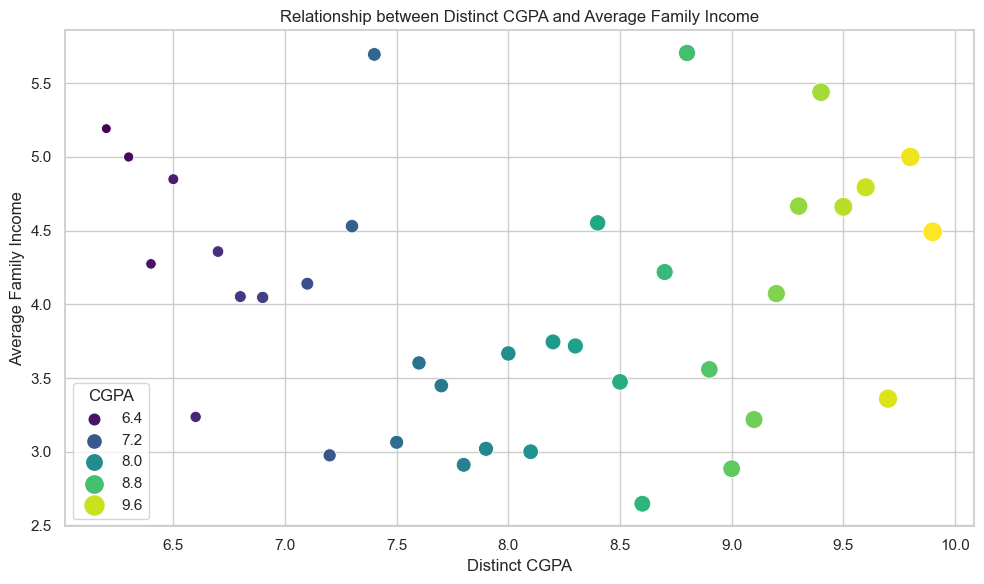

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def representative_income(income_range):
    #Remove 'lakh' from the string
    income_range = income_range.replace(' Lakh', '') 
    #Average of range of family income
    if '-' in income_range:
        lower, upper = income_range.split('-')
        return (float(lower) + float(upper)) / 2
    elif '+' in income_range:
        lower = income_range.rstrip('+')
        return float(lower) + 1
    else:
        return float(income_range)


df = pd.read_excel(r"C:\Users\TUF\Downloads\Data analyst Data.xlsx")

df['Family Income'] = df['Family Income'].str.replace('[^\d.]', '', regex=True)
df['Family Income'] = pd.to_numeric(df['Family Income'], errors='coerce')



selected_data = df.dropna(subset=['Family Income', 'CGPA'])

cgpa_counts = selected_data['CGPA'].value_counts()
avg_income_by_cgpa = selected_data.groupby('CGPA')['Family Income'].mean().reset_index()

plt.figure(figsize=(10, 6))

#Use Seaborn scatterplot
sns.scatterplot(data=avg_income_by_cgpa, x='CGPA', y='Family Income', hue='CGPA', palette='viridis', size='CGPA', sizes=(50, 200))

plt.xlabel('Distinct CGPA')
plt.ylabel('Average Family Income')
plt.title('Relationship between Distinct CGPA and Average Family Income')

plt.tight_layout()
plt.show()


In [27]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(selected_data['CGPA'], selected_data['Family Income'])

# Print the equation of the regression line
print(f"Family Income = {intercept:.2f} + {slope:.2f} * CGPA")


Family Income = 3.53 + 0.05 * CGPA
